# 氏名　：　トゥラトゥン
# 学籍番号　：　24CA0128

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
%matplotlib inline

from matplotlib import rcParams
rcParams['font.family'] = 'MS Gothic'

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

print('done')

done


In [5]:
df_pcr = pd.read_csv('pcr_positive_daily.csv')
df_pcr

,日付,PCR 検査陽性者数(単日)
0,2020/1/16,1.0
1,2020/1/17,0.0
2,2020/1/18,0.0
3,2020/1/19,0.0
4,2020/1/20,0.0
...,...,...
1204,2023/5/4,7343.0
1205,2023/5/5,5807.0
1206,2023/5/6,6229.0
1207,2023/5/7,14436.0


In [8]:
df_pcr.columns = ('Date', 'PCR')
df_pcr

,Date,PCR
0,2020/1/16,1.0
1,2020/1/17,0.0
2,2020/1/18,0.0
3,2020/1/19,0.0
4,2020/1/20,0.0
...,...,...
1204,2023/5/4,7343.0
1205,2023/5/5,5807.0
1206,2023/5/6,6229.0
1207,2023/5/7,14436.0


In [6]:
df_death = pd.read_csv('death_total.csv')
df_death

,日付,死亡者数
0,2020/2/14,1.0
1,2020/2/15,1.0
2,2020/2/16,1.0
3,2020/2/17,1.0
4,2020/2/18,1.0
...,...,...
1174,2023/5/3,74614.0
1175,2023/5/4,74633.0
1176,2023/5/5,74645.0
1177,2023/5/6,74654.0


In [10]:
df_death.columns = ('Date', 'DEATH')
df_death

,Date,DEATH
0,2020/2/14,1.0
1,2020/2/15,1.0
2,2020/2/16,1.0
3,2020/2/17,1.0
4,2020/2/18,1.0
...,...,...
1174,2023/5/3,74614.0
1175,2023/5/4,74633.0
1176,2023/5/5,74645.0
1177,2023/5/6,74654.0


In [11]:
df_pcr_death = pd.merge(df_pcr, df_death, on = 'Date')
df_pcr_death

,Date,PCR,DEATH
0,2020/2/14,5.0,1.0
1,2020/2/15,4.0,1.0
2,2020/2/16,1.0,1.0
3,2020/2/17,6.0,1.0
4,2020/2/18,8.0,1.0
...,...,...,...
1174,2023/5/3,16631.0,74614.0
1175,2023/5/4,7343.0,74633.0
1176,2023/5/5,5807.0,74645.0
1177,2023/5/6,6229.0,74654.0


In [ ]:
### 

In [17]:
df_pcr_death["CumulativePCR"] = df_pcr["PCR"].cumsum()
df_pcr_death["DeathRate"] = df_death["DEATH"] / df_pcr_death["CumulativePCR"]

df_pcr_death_mean = df_pcr_death["DeathRate"].mean()
df_pcr_death_sigma = df_pcr_death["DeathRate"].std()

n = df_pcr_death["DeathRate"].count()

print("df_pcr_death_mean : ", df_pcr_death_mean)
print("df_pcr_death_sigma : ", df_pcr_death_sigma)
print("n : ", n)

df_pcr_death_mean :  0.04267599880705199
df_pcr_death_sigma :  0.12204951059388162
n :  1179


### 90%信頼区間

In [23]:
from scipy.stats import t

alpha = 0.1
confidence = 1 - alpha
dof = n - 1
z_left, z_right = t.interval(confidence, dof)
print('-t_{:.3f} / 2 ({}) = {:3f}, t_{:3f} / 2 ({}) = {:3f}'.format(alpha, n - 1, z_left, alpha, n -1, z_right))
L = df_pcr_death_mean + z_left * df_pcr_death_sigma / np.sqrt(n)
U = df_pcr_death_mean + z_right * df_pcr_death_sigma / np.sqrt(n)
print('90%CI = [{:.3f}, {:.3f}]'.format(L, U))

-t_0.100 / 2 (1178) = -1.646148, t_0.100000 / 2 (1178) = 1.646148
90%CI = [0.037, 0.049]


### 95%信頼区間

In [24]:
alpha = 0.05
confidence = 1 - alpha
dof = n - 1
z_left, z_right = t.interval(confidence, dof)
print('-t_{:.3f} / 2 ({}) = {:3f}, t_{:3f} / 2 ({}) = {:3f}'.format(alpha, n - 1, z_left, alpha, n -1, z_right))
L = df_pcr_death_mean + z_left * df_pcr_death_sigma / np.sqrt(n)
U = df_pcr_death_mean + z_right * df_pcr_death_sigma / np.sqrt(n)
print('90%CI = [{:.3f}, {:.3f}]'.format(L, U))

-t_0.050 / 2 (1178) = -1.961980, t_0.050000 / 2 (1178) = 1.961980
90%CI = [0.036, 0.050]


### 99%信頼区間

In [25]:
alpha = 0.01
confidence = 1 - alpha
dof = n - 1
z_left, z_right = t.interval(confidence, dof)
print('-t_{:.3f} / 2 ({}) = {:3f}, t_{:3f} / 2 ({}) = {:3f}'.format(alpha, n - 1, z_left, alpha, n -1, z_right))
L = df_pcr_death_mean + z_left * df_pcr_death_sigma / np.sqrt(n)
U = df_pcr_death_mean + z_right * df_pcr_death_sigma / np.sqrt(n)
print('90%CI = [{:.3f}, {:.3f}]'.format(L, U))

-t_0.010 / 2 (1178) = -2.580009, t_0.010000 / 2 (1178) = 2.580009
90%CI = [0.034, 0.052]


#### 信頼区間は推定値の不確かさを示す重要な指標ですが、信頼度（例えば90%、95%、99%）が異なると幅も変わります。  
#### 複数の信頼区間を個別に計算することで、どの程度の確信度で推定結果を捉えたいかに応じて適切な判断ができ、過度な誤解や過信を防ぐことができます。  
#### 特に感染症データのように変動が大きく社会的影響が大きい場合、様々な信頼度で区間を比較することは政策立案や医療対応に役立ちます。  
#### したがって、私は個別に計算し、状況に応じて使い分けることが望ましいと考え、区間推定を積極的に使おうと思いました。  

## ここでは、以下の相関関係を分析します。  
## 実効再生産数と陽性者数  
## 重症者数と死亡者数

In [29]:
df_severe = pd.read_csv('severe_daily.csv')
df_severe.columns = ('Date', 'Severe')
df_severe

,Date,Severe
0,2020/2/5,0.0
1,2020/2/6,0.0
2,2020/2/7,0.0
3,2020/2/8,0.0
4,2020/2/9,0.0
...,...,...
1183,2023/5/3,71.0
1184,2023/5/4,73.0
1185,2023/5/5,74.0
1186,2023/5/6,74.0


In [37]:
df_effective = pd.read_csv('effective_reproduction_number.csv')
df_effective.columns = ('Date', 'EFRN')
df_effective

,Date,EFRN
0,2020/3/1,1.31
1,2020/3/2,1.18
2,2020/3/3,1.29
3,2020/3/4,1.25
4,2020/3/5,1.17
...,...,...
1159,2023/5/4,1.02
1160,2023/5/5,1.00
1161,2023/5/6,0.96
1162,2023/5/7,1.00


Correlation between Effective Reproduction Number and PCR: -0.032
Correlation between Severe and DEATH: -0.115


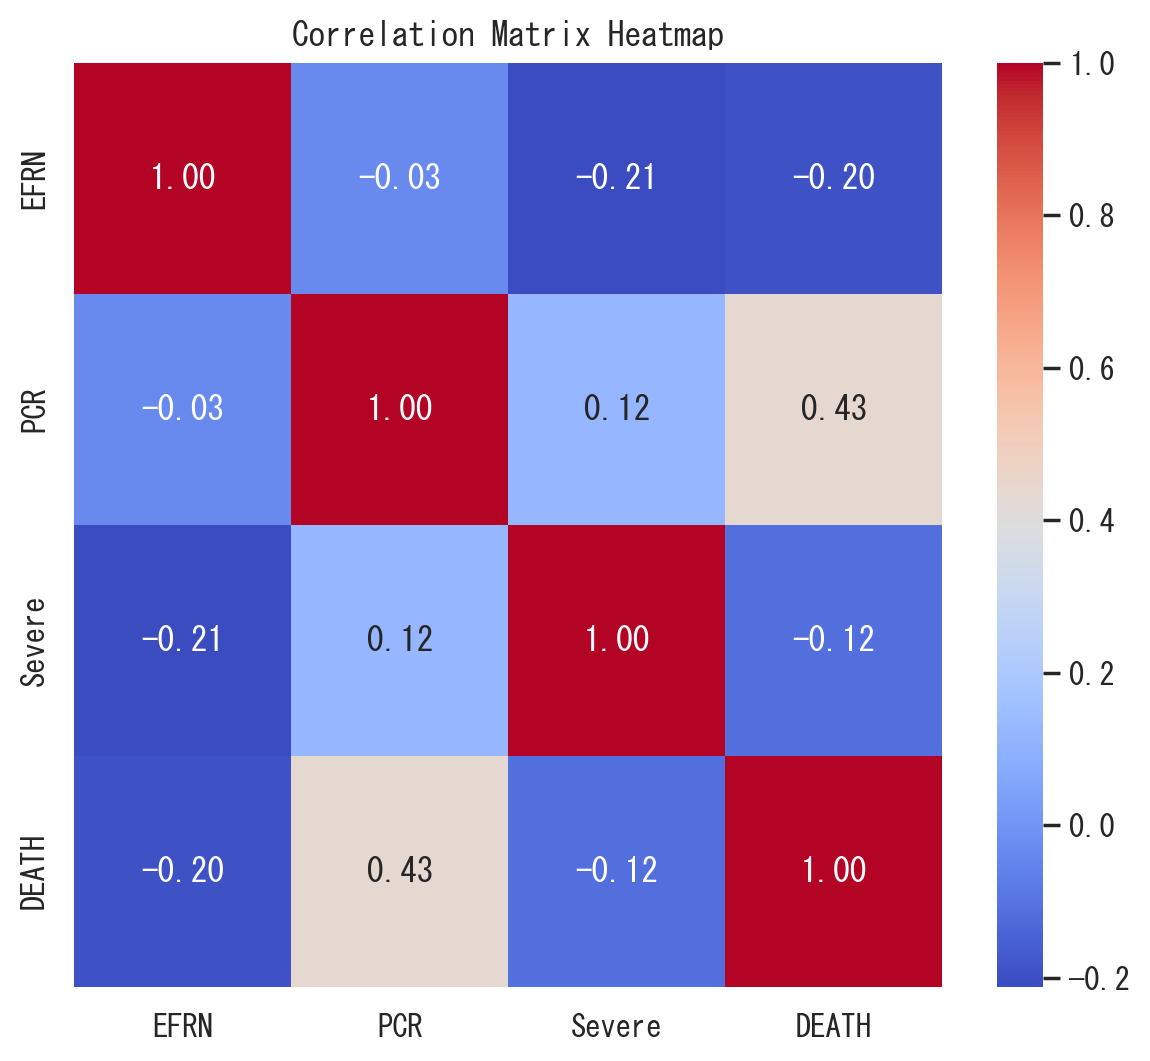

In [38]:
df_merged = df_pcr.merge(df_effective, on='Date')\
                  .merge(df_severe, on='Date')\
                  .merge(df_death, on='Date')

# 相関係数計算
corr_reprod_pcr = df_merged['EFRN'].corr(df_merged['PCR'])
print(f"Correlation between Effective Reproduction Number and PCR: {corr_reprod_pcr:.3f}")

corr_severe_death = df_merged['Severe'].corr(df_merged['DEATH'])
print(f"Correlation between Severe and DEATH: {corr_severe_death:.3f}")

# 相関行列作成とヒートマップ表示
corr_matrix = df_merged[['EFRN', 'PCR', 'Severe', 'DEATH']].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 感染の広がりを理解するには、関連するデータ同士がどう関係しているか知ることが大切です。相関分析はそのつながりを見つけるために使います。  
#### 感染は複雑なので、数字の関係を知ることで対策を考えやすくなります。だから相関分析は役に立つと思います。

## ここでは、陽性者数・重症者数・死亡者数の推移をグラフで確認します。  
## また、実効再生産数と陽性者数の関係を、移動平均やピーク検出を用いて分析します。

In [ ]:
# グラフ描画：陽性者数・重症者数・死亡者数の推移
plt.figure(figsize=(12,6))
plt.plot(df_pcr['Date'], df_pcr['PCR'], label='Positive Cases')
plt.plot(df_severe['Date'], df_severe['Severe'], label='Severe Cases')
plt.plot(df_death['Date'], df_death['DEATH'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trends of Positive, Severe, and Death Cases')
plt.legend()
plt.show()

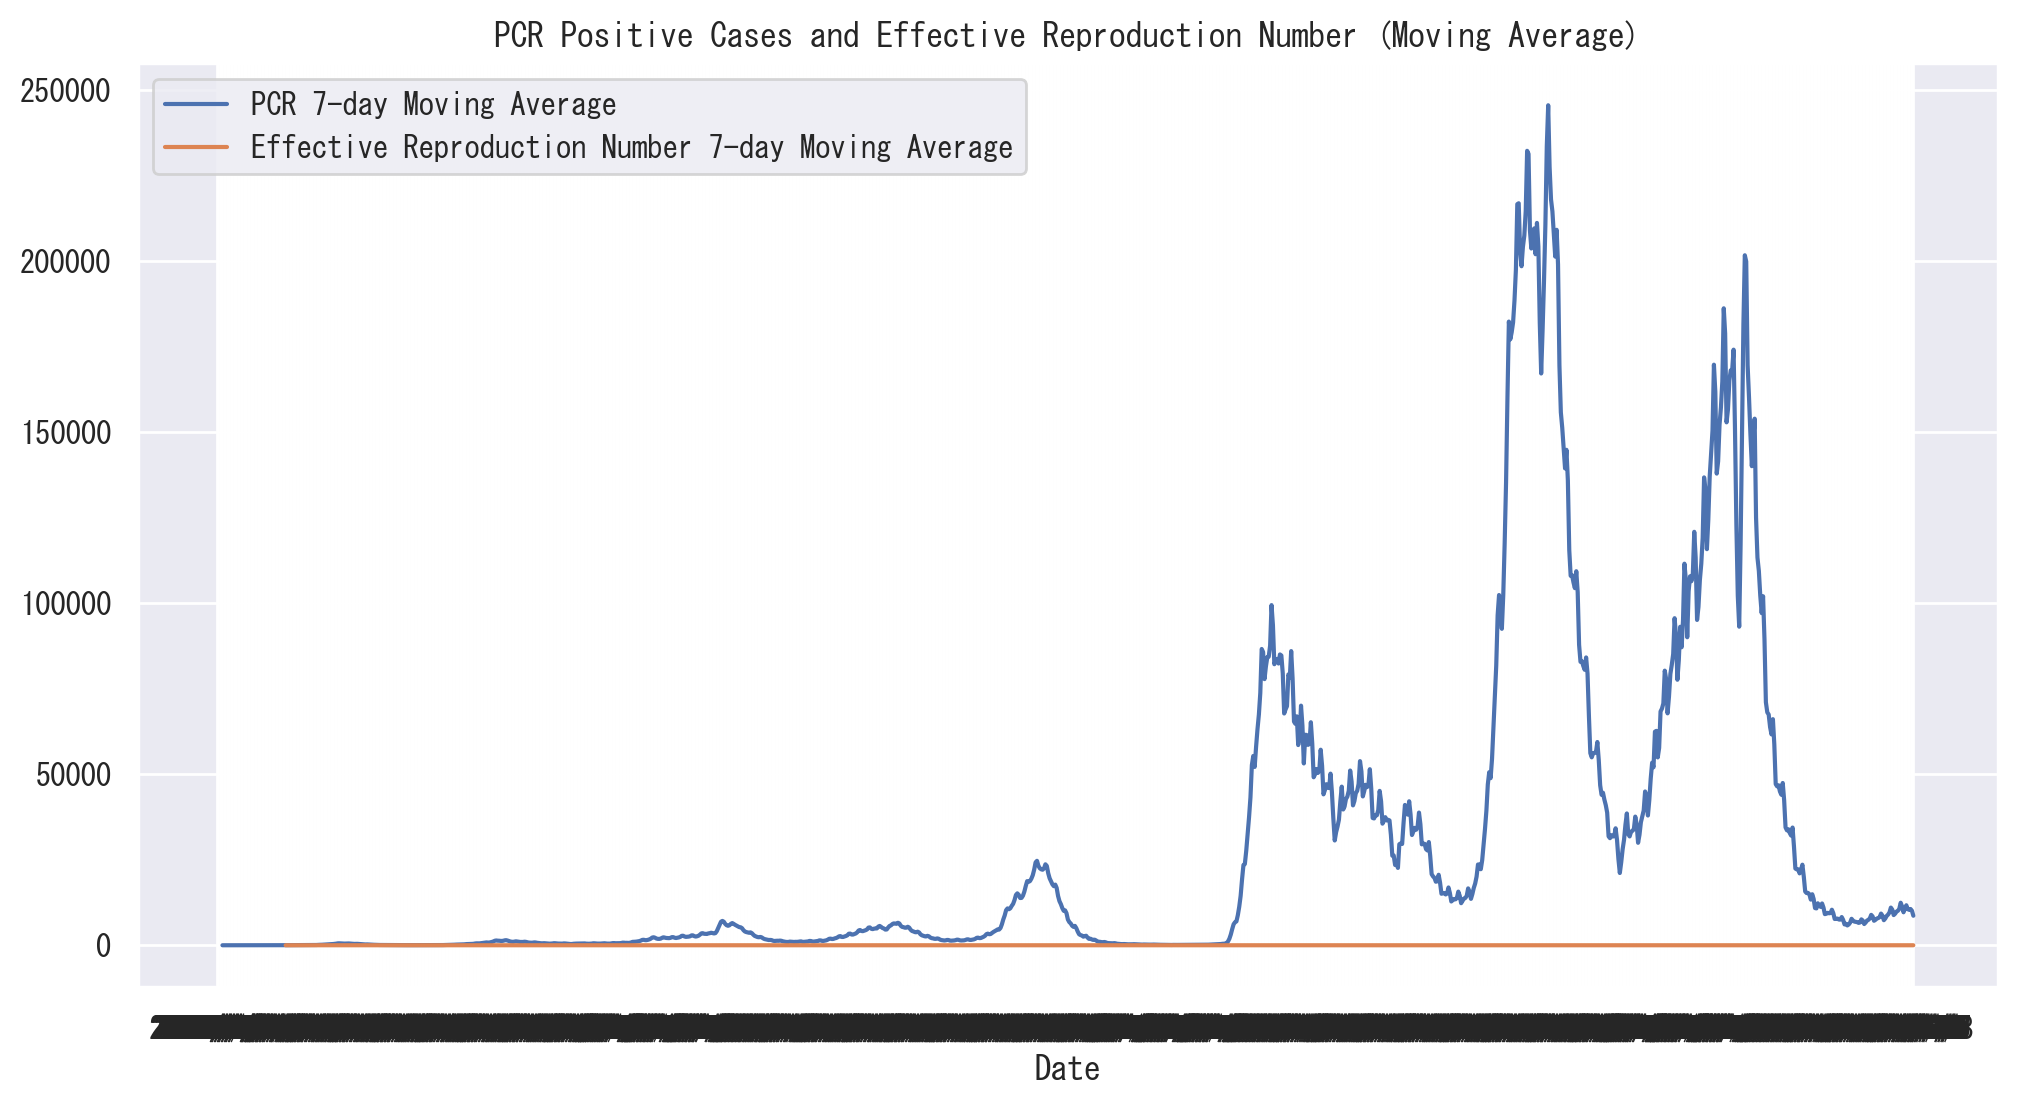

In [40]:
df_pcr['PCR_MA'] = df_pcr['PCR'].rolling(window = 5, center = False).mean()
df_effective['ERN_MA'] = df_effective['EFRN'].rolling(window = 5, center = False).mean()

plt.figure(figsize=(12,6))
plt.plot(df_pcr['Date'], df_pcr['PCR_MA'], label = 'PCR 7-day Moving Average')
plt.plot(df_effective['Date'], df_effective['ERN_MA'], label = 'Effective Reproduction Number 7-day Moving Average')
plt.xlabel('Date')
plt.title('PCR Positive Cases and Effective Reproduction Number (Moving Average)')
plt.legend()
plt.show()

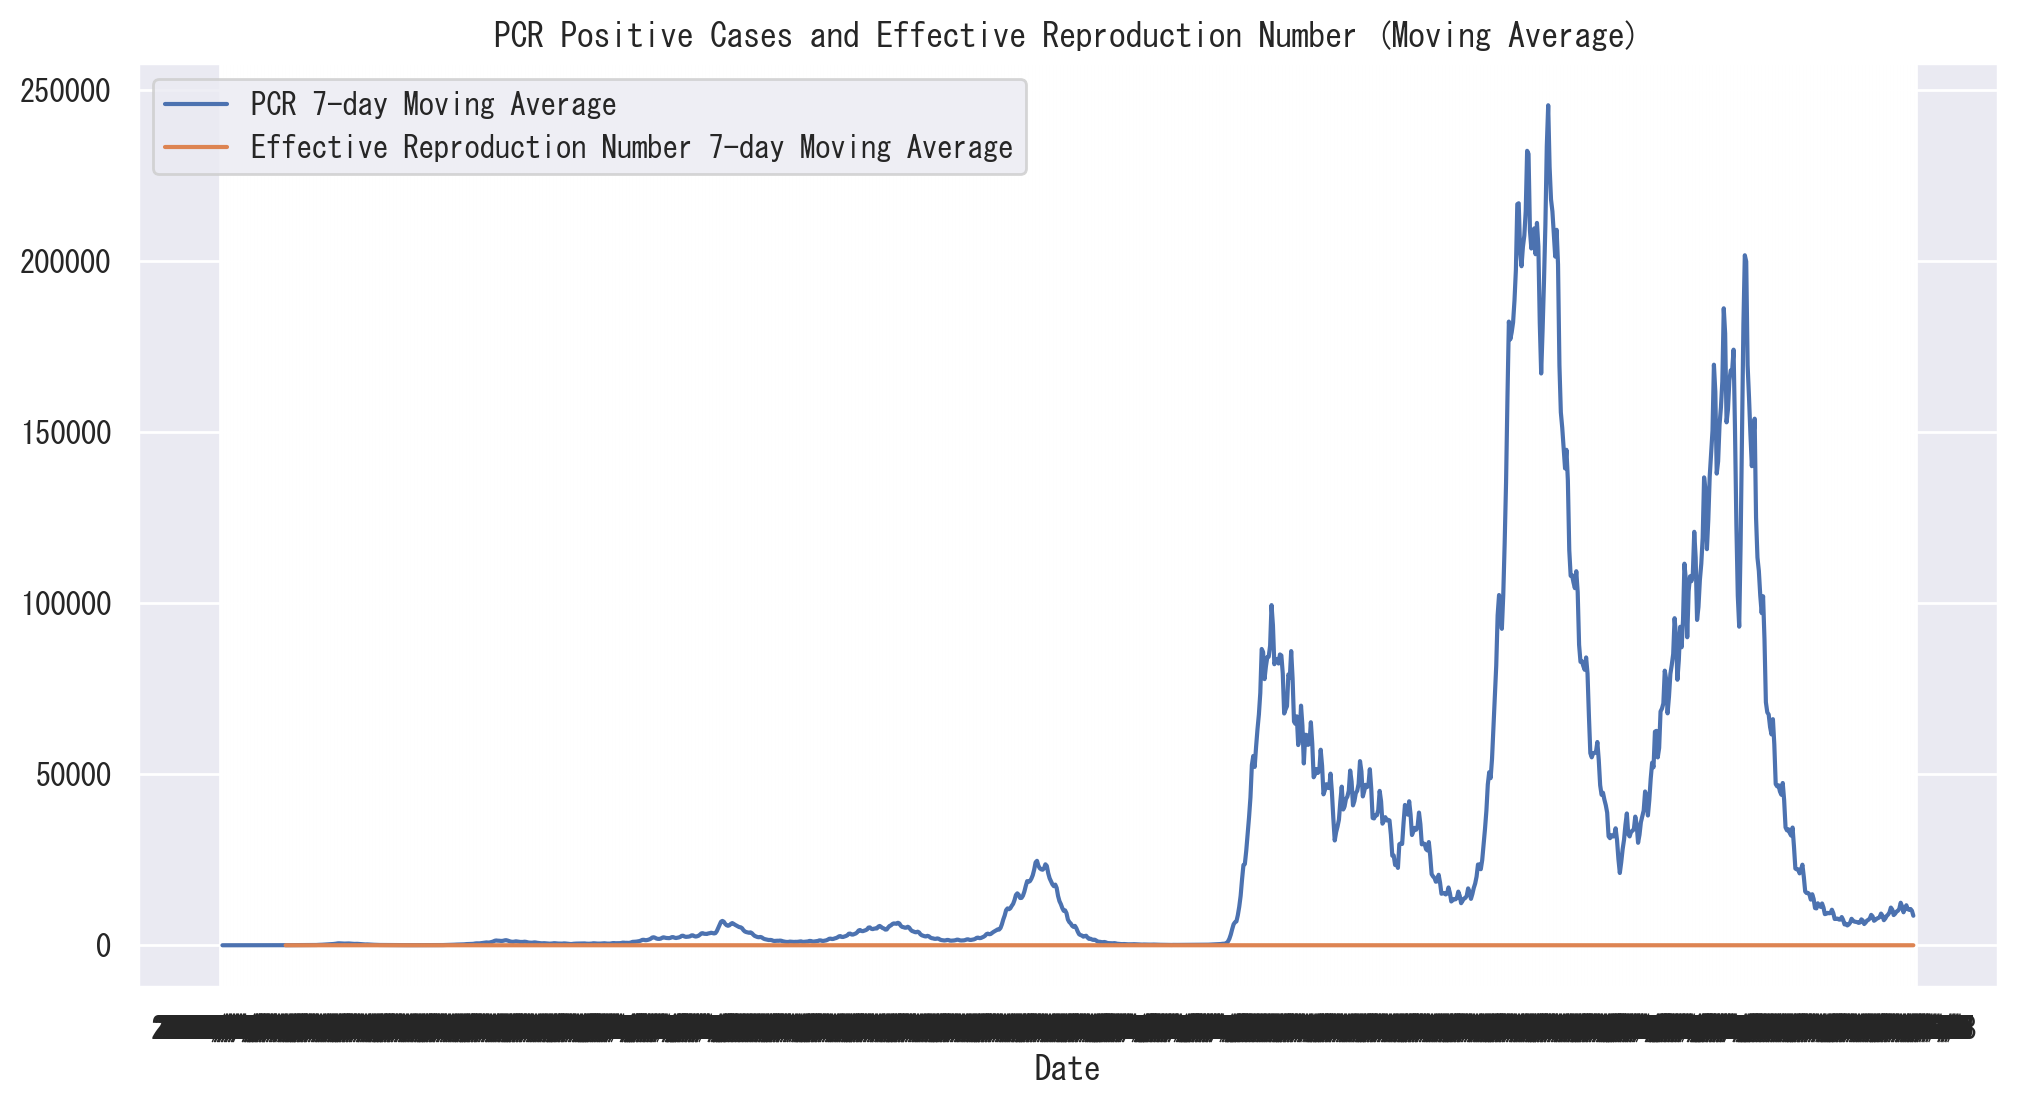

In [41]:
df_pcr['PCR_MA'] = df_pcr['PCR'].rolling(window = 5, center = True).mean()
df_effective['ERN_MA'] = df_effective['EFRN'].rolling(window = 5, center = True).mean()

plt.figure(figsize=(12,6))
plt.plot(df_pcr['Date'], df_pcr['PCR_MA'], label = 'PCR 7-day Moving Average')
plt.plot(df_effective['Date'], df_effective['ERN_MA'], label = 'Effective Reproduction Number 7-day Moving Average')
plt.xlabel('Date')
plt.title('PCR Positive Cases and Effective Reproduction Number (Moving Average)')
plt.legend()
plt.show()

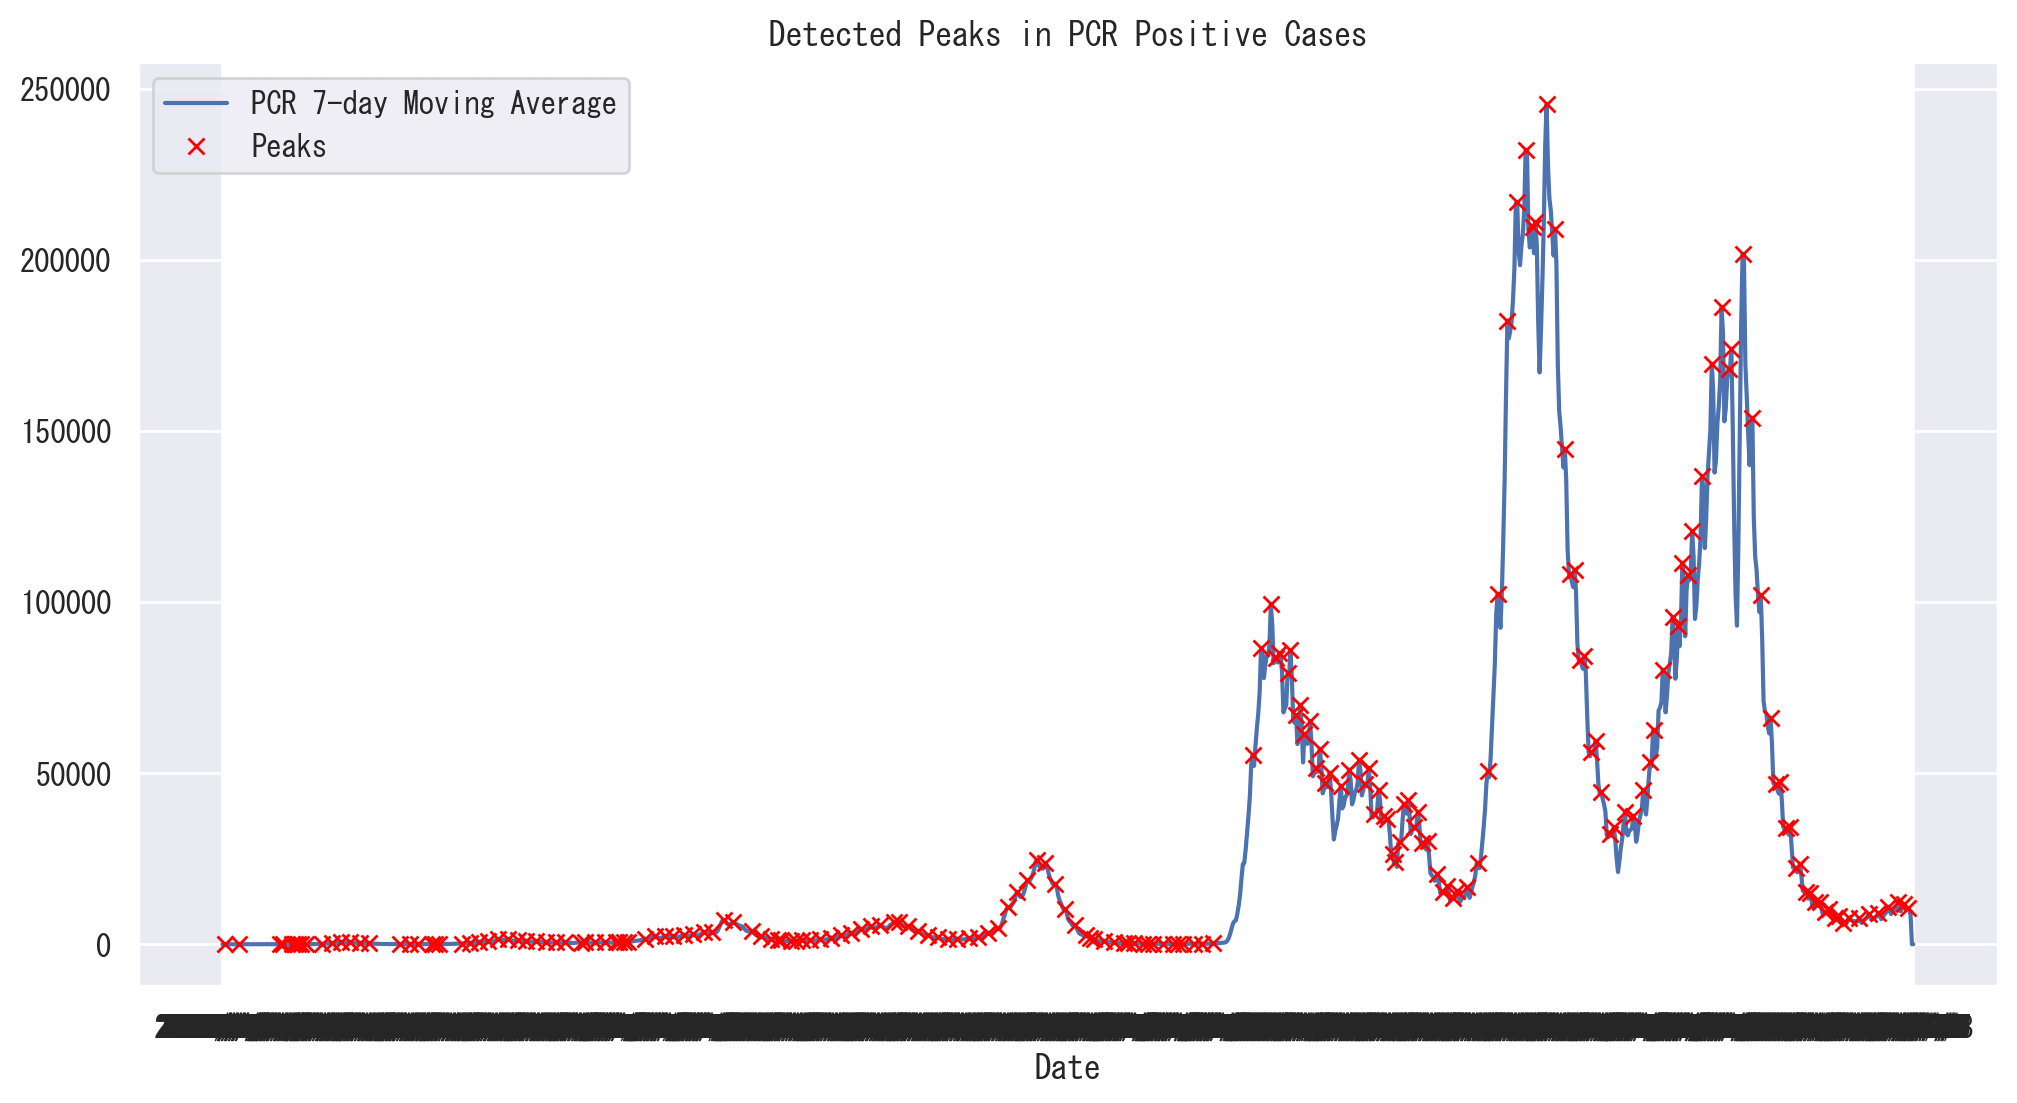

In [42]:
pcr_ma = df_pcr['PCR_MA'].fillna(0).values
dates = df_pcr['Date']

peaks_indices = []
for i in range(1, len(pcr_ma) - 1):
    if pcr_ma[i] > pcr_ma[i-1] and pcr_ma[i] > pcr_ma[i+1]:
        peaks_indices.append(i)

plt.figure(figsize=(12,6))
plt.plot(dates, pcr_ma, label='PCR 7-day Moving Average')
plt.plot(dates.iloc[peaks_indices], pcr_ma[peaks_indices], "x", label='Peaks', color='red')
plt.xlabel('Date')
plt.title('Detected Peaks in PCR Positive Cases')
plt.legend()
plt.show()

In [46]:
df_age_serious = pd.read_csv('agegroup_serious.csv')
df_age_serious

,year,month,date,age_group,male,female
0,2023,4,25,10歳未満,0,1
1,2023,4,25,10代,0,0
2,2023,4,25,20代,1,1
3,2023,4,25,30代,1,1
4,2023,4,25,40代,2,0
5,2023,4,25,50代,2,1
6,2023,4,25,60代,2,0
7,2023,4,25,70代,6,2
8,2023,4,25,80代,1,3
9,2023,4,25,90代以上,0,1


In [45]:
df_age_mortality = pd.read_csv('agegroup_mortality.csv')
df_age_mortality

,year,month,date,age_group,male,female
0,2023,4,25,10歳未満,17,22
1,2023,4,25,10代,13,8
2,2023,4,25,20代,51,26
3,2023,4,25,30代,137,56
4,2023,4,25,40代,438,197
5,2023,4,25,50代,1254,403
6,2023,4,25,60代,2864,955
7,2023,4,25,70代,8454,3638
8,2023,4,25,80代,13898,10776
9,2023,4,25,90代以上,6676,11360


#### 男女別死亡者数合計

In [55]:
male_death = df_age_mortality['male'].sum()
female_death = df_age_mortality['female'].sum()
print(male_death)
print(female_death)

# 感染者数が無いので仮に男女とも10万人と仮定（検定は参考程度)
male_total = 100000
female_total = 100000


### QA を使いながら実験しました。
observed = np.array([
    [male_death, male_total - male_death],
    [female_death, female_total - female_death]
])

total = observed.sum()
row_sums = observed.sum(axis=1)
col_sums = observed.sum(axis=0)
expected = np.outer(row_sums, col_sums) / total

chi_square_stat = ((observed - expected)**2 / expected).sum()
dof = (observed.shape[0] -1) * (observed.shape[1] -1)

print(f"Chi-square statistic: {chi_square_stat:.3f}")
print(f"Degrees of freedom: {dof}")

critical_value_95 = 3.84  # 自由度1の95%臨界値

if chi_square_stat > critical_value_95:
    print("男性と女性の死亡率に有意差があります（95%信頼）")
else:
    print("有意差はありません（95%信頼）")



### t検定：高齢者と若年層の重症率差検定 ###

# 高齢者グループ
elderly_groups = ['70代', '80代', '90代以上']
# 若年層グループ（高齢者以外）
young_groups = [age for age in df_age_serious['age_group'].unique() if age not in elderly_groups]

# 男女合計の重症者数を年齢グループごとに集計
df_age_serious['total_serious'] = df_age_serious['male'] + df_age_serious['female']

elderly_serious = df_age_serious[df_age_serious['age_group'].isin(elderly_groups)]['total_serious']
young_serious = df_age_serious[df_age_serious['age_group'].isin(young_groups)]['total_serious']

# t検定統計量計算（Welchのt検定）
mean_elderly = elderly_serious.mean()
mean_young = young_serious.mean()
var_elderly = elderly_serious.var(ddof=1)
var_young = young_serious.var(ddof=1)
n_elderly = len(elderly_serious)
n_young = len(young_serious)

t_num = mean_elderly - mean_young
t_den = np.sqrt(var_elderly/n_elderly + var_young/n_young)
t_stat = t_num / t_den

# 自由度の近似計算
df_num = (var_elderly/n_elderly + var_young/n_young)**2
df_den = ((var_elderly/n_elderly)**2)/(n_elderly -1) + ((var_young/n_young)**2)/(n_young -1)
df = df_num / df_den

# p値計算の代わりに絶対値t_stat > 2で有意差ありと仮置き（自由度により多少変動）
print(f"\nt-statistic: {t_stat:.3f}")
print(f"Degrees of freedom (approx.): {df:.1f}")

if abs(t_stat) > 2:
    print("高齢者と若年層の重症率に有意差があります（概ね95%信頼）")
else:
    print("有意差はありません（概ね95%信頼）")

33802
27441
Chi-square statistic: 952.290
Degrees of freedom: 1
男性と女性の死亡率に有意差があります（95%信頼）

t-statistic: 1.272
Degrees of freedom (approx.): 2.1
有意差はありません（概ね95%信頼）


#### カイ二乗検定は、男女の死亡者数と非死亡者数から死亡率に差があるかを調べるために用いました。これはカテゴリー別の比率の違いを検証するのに適した方法です。
#### 一方、t検定は年齢層ごとの重症者数の平均値に差があるかを検定しました。重症化は連続的な数値データなので、平均の差を見るのに向いています。
#### 今回はp値の正確な計算を省略し、95%の信頼度で有意差があるかどうかを判定するために、カイ二乗の臨界値やt値の閾値2を基準にしました。
#### この方法でも大まかな判断は十分可能だと考えます。

In [56]:
from mlxtend.frequent_patterns import apriori, association_rules

# 重症フラグ（合計が0より大きければ1）
df_age_mortality['total_serious'] = df_age_mortality['male'] + df_age_mortality['female']
df_age_mortality['serious_flag'] = (df_age_mortality['total_serious'] > 0).astype(int)

# 年代をダミー変数化
df_age = pd.get_dummies(df_age_mortality['age_group'])

# 性別のフラグを作成（0 or 1）
df_age_mortality['male_flag'] = (df_age_mortality['male'] > 0).astype(int)
df_age_mortality['female_flag'] = (df_age_mortality['female'] > 0).astype(int)

# 必要なカラムをまとめる
df_encoded = pd.concat([df_age, df_age_mortality[['male_flag', 'female_flag', 'serious_flag']]], axis=1)

# Aprioriで頻出アイテムセットを抽出
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# ルール抽出
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                            antecedents  \
0                                 (10代)   
1                                 (10代)   
2                                 (10代)   
3                               (10歳未満)   
4                               (10歳未満)   
..                                  ...   
197  (serious_flag, 90代以上, female_flag)   
198                  (male_flag, 90代以上)   
199               (serious_flag, 90代以上)   
200                (90代以上, female_flag)   
201                             (90代以上)   

                                consequents  support  confidence  lift  
0                               (male_flag)      0.1         1.0   1.0  
1                             (female_flag)      0.1         1.0   1.0  
2                            (serious_flag)      0.1         1.0   1.0  
3                               (male_flag)      0.1         1.0   1.0  
4                             (female_flag)      0.1         1.0   1.0  
..                                      ...  

C:\Users\ca\.conda\envs\mybase24\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\ca\.conda\envs\mybase24\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


#### 年齢・性別・地域などの特徴量から重症化を予測する決定木モデルを構築します

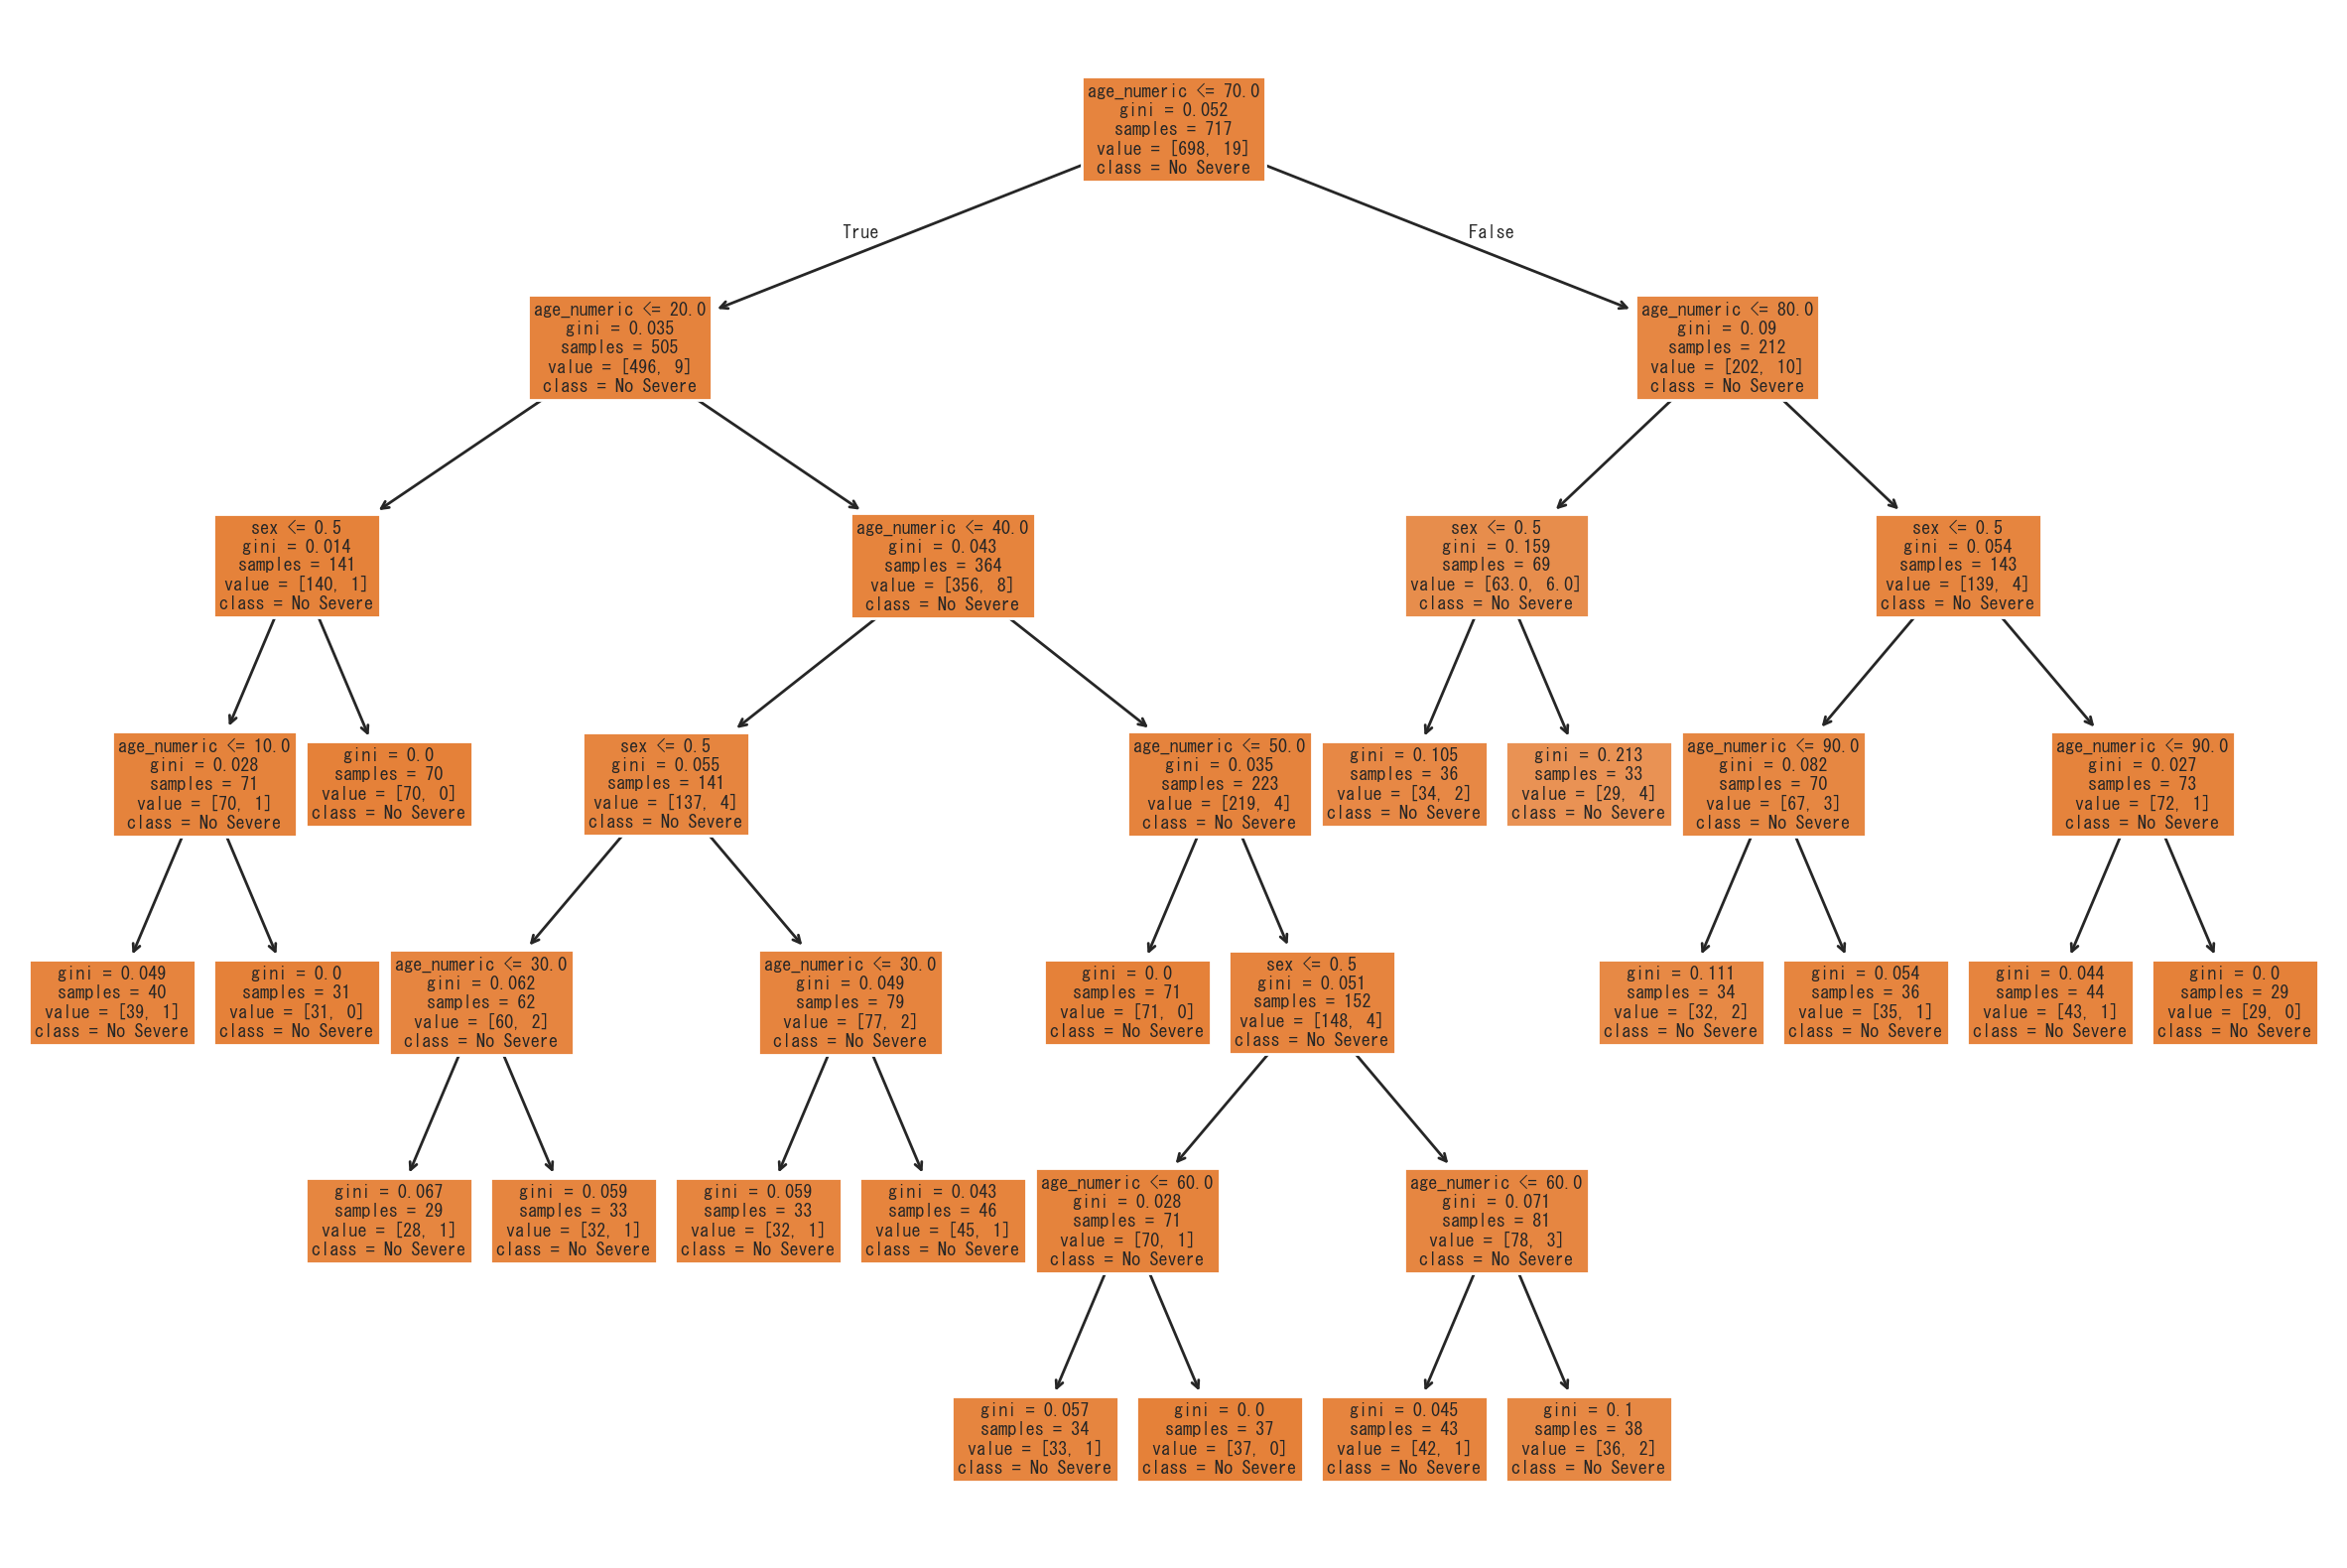

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 年代を数値化（年代の中央値を使う）
age_map = {
    '10歳未満': 5, '10代': 15, '20代': 25, '30代': 35,
    '40代': 45, '50代': 55, '60代': 65, '70代': 75,
    '80代': 85, '90代以上': 95
}
df_age_serious['age_numeric'] = df_age_serious['age_group'].map(age_map)

# 男性重症者データをまとめて作成
male_df = df_age_serious.loc[df_age_serious['male'] > 0, ['age_numeric', 'male']].copy()
male_df = male_df.loc[male_df.index.repeat(male_df['male'])].reset_index(drop=True)
male_df['sex'] = 1
male_df['severe'] = 1
male_df = male_df.drop(columns=['male'])

# 女性重症者データをまとめて作成
female_df = df_age_serious.loc[df_age_serious['female'] > 0, ['age_numeric', 'female']].copy()
female_df = female_df.loc[female_df.index.repeat(female_df['female'])].reset_index(drop=True)
female_df['sex'] = 0
female_df['severe'] = 1
female_df = female_df.drop(columns=['female'])

# 重症者データを結合
df_severe_individuals = pd.concat([male_df, female_df], ignore_index=True)

# 便宜的に重症でない人（severe=0）をまとめて追加（例: 1000人）
np.random.seed(0)
n_non_severe = 1000
age_choices = list(age_map.values())
sex_choices = [0, 1]

df_non_severe = pd.DataFrame({
    'age_numeric': np.random.choice(age_choices, size=n_non_severe),
    'sex': np.random.choice(sex_choices, size=n_non_severe),
    'severe': 0
})

# 全データ結合
df_sim = pd.concat([df_severe_individuals, df_non_severe], ignore_index=True)

# 特徴量と目的変数
X = df_sim[['age_numeric', 'sex']]
y = df_sim['severe']

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 決定木モデル学習
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 決定木可視化
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=['age_numeric', 'sex'], class_names=['No Severe', 'Severe'], filled=True)
plt.show()